# APPLICATION TASK DATA SCIENTIST Preprocessing
## Paul Grasserbauer
## Predicting the weekly aggregated sales for four weeks in advance
### Dataset: Online Retail II UCI - A real online retail transaction data set of two years

I splitted the work into two seperate Jupyter Notebooks. This one is for data understanding/insight and preprocessing steps. The other one was used for forecasting the aggregated sales. 

In [68]:
import pandas as pd
import numpy as np
from datetime import datetime


In [69]:
df=pd.read_csv("online_retail_II.csv",index_col='InvoiceDate',parse_dates=True)

In [70]:
df

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country
InvoiceDate,,,,,,,
2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom
2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom
2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom
2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom
2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France
2011-12-09 12:50:00,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France


### First of all I printed some basic information of the dataset

In [71]:
print(df.info())
print()
print(df.describe())
print()
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1067371 entries, 2009-12-01 07:45:00 to 2011-12-09 12:50:00
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   Price        1067371 non-null  float64
 5   Customer ID  824364 non-null   float64
 6   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 65.1+ MB
None

           Quantity         Price    Customer ID
count  1.067371e+06  1.067371e+06  824364.000000
mean   9.938898e+00  4.649388e+00   15324.638504
std    1.727058e+02  1.235531e+02    1697.464450
min   -8.099500e+04 -5.359436e+04   12346.000000
25%    1.000000e+00  1.250000e+00   13975.000000
50%    3.000000e+00  2.100000e+00   15255.000000
75%    1.000000e+01  4.150000e+00   16797.00000

### For example I see that there are some missing values and how many different values exist for each individual column. 

### After I gained this basics we can try to clean the data as good as possible. The dataset description says: If InvoiceNo starts with the letter 'c', it indicates a cancellation of the order. I also recognized some negative values for the quantity of products - I assume that they are the cancelled orders and ascertained this theory, which was correct for the majority of cancellations. Sometimes also the price was negative or 0.  Therefore I dropped all these rows.

In [72]:
df.loc[df['Invoice'].str.contains("C")]


,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country
InvoiceDate,,,,,,,
2009-12-01 10:33:00,C489449,22087,PAPER BUNTING WHITE LACE,-12,2.95,16321.0,Australia
2009-12-01 10:33:00,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,1.65,16321.0,Australia
2009-12-01 10:33:00,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,4.25,16321.0,Australia
2009-12-01 10:33:00,C489449,21896,POTTING SHED TWINE,-6,2.10,16321.0,Australia
2009-12-01 10:33:00,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2.95,16321.0,Australia
...,...,...,...,...,...,...,...
2011-12-09 09:57:00,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,0.83,14397.0,United Kingdom
2011-12-09 10:28:00,C581499,M,Manual,-1,224.69,15498.0,United Kingdom
2011-12-09 11:57:00,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,10.95,15311.0,United Kingdom


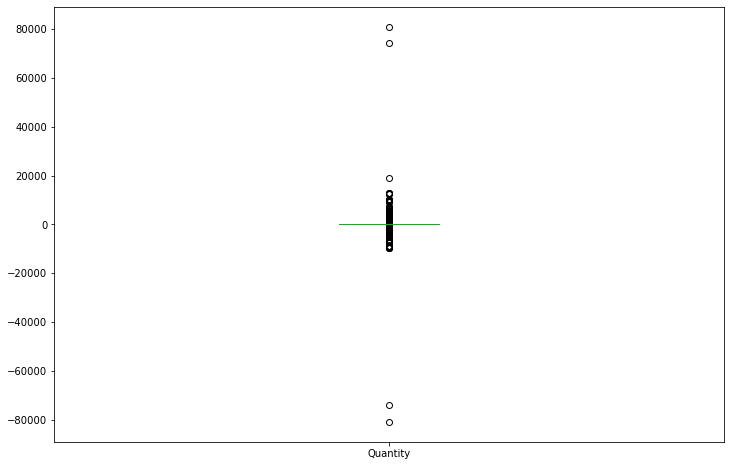

In [73]:
df['Quantity'].plot.box();


<AxesSubplot:>

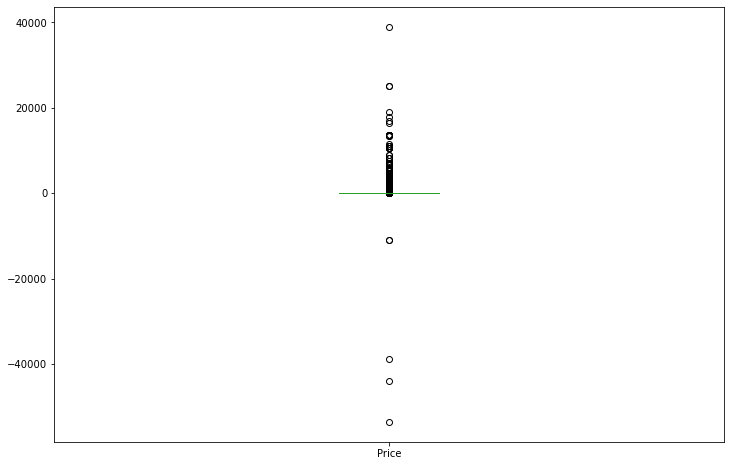

In [74]:
df['Price'].plot.box()

In [75]:
df=df[(df['Quantity']>0)&(df['Price']>0)].copy()
print(df.info())
print()
print(df.describe())
print()
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1041671 entries, 2009-12-01 07:45:00 to 2011-12-09 12:50:00
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1041671 non-null  object 
 1   StockCode    1041671 non-null  object 
 2   Description  1041671 non-null  object 
 3   Quantity     1041671 non-null  int64  
 4   Price        1041671 non-null  float64
 5   Customer ID  805549 non-null   float64
 6   Country      1041671 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 63.6+ MB
None

           Quantity         Price    Customer ID
count  1.041671e+06  1.041671e+06  805549.000000
mean   1.096345e+01  4.077038e+00   15331.954970
std    1.265149e+02  5.144898e+01    1696.737039
min    1.000000e+00  1.000000e-03   12346.000000
25%    1.000000e+00  1.250000e+00   13982.000000
50%    3.000000e+00  2.100000e+00   15271.000000
75%    1.000000e+01  4.130000e+00   16805.00000

In [76]:
cancelled = df.loc[df['Invoice'].str.contains("C")]
cancelled

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country
InvoiceDate,,,,,,,
2010-02-01 08:24:00,C496350,M,Manual,1,373.57,NaN,United Kingdom


In [77]:
idxc = cancelled.index
df.drop(idxc,inplace=True)

### Postage data is also not very relevant for the task and was dropped as well. Moreover I only have missing data in the column Customer ID now which is not really a problem but nevertheless I replace it with a default value for a customer number which just tells us that the customer is not known for that order (99999)

In [78]:
postage = df.loc[df['StockCode'].str.contains("POST")]
postage

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country
InvoiceDate,,,,,,,
2009-12-01 09:28:00,489439,POST,POSTAGE,3,18.0,12682.0,France
2009-12-01 09:55:00,489444,POST,POSTAGE,1,141.0,12636.0,USA
2009-12-01 10:10:00,489447,POST,POSTAGE,1,130.0,12362.0,Belgium
2009-12-01 11:50:00,489526,POST,POSTAGE,6,18.0,12533.0,Germany
2009-12-01 12:52:00,489557,POST,POSTAGE,4,18.0,12490.0,France
...,...,...,...,...,...,...,...
2011-12-09 10:13:00,581494,POST,POSTAGE,2,18.0,12518.0,Germany
2011-12-09 11:59:00,581570,POST,POSTAGE,1,18.0,12662.0,Germany
2011-12-09 12:09:00,581574,POST,POSTAGE,2,18.0,12526.0,Germany


In [79]:
idxp = postage.index
df.drop(idxp,inplace=True)

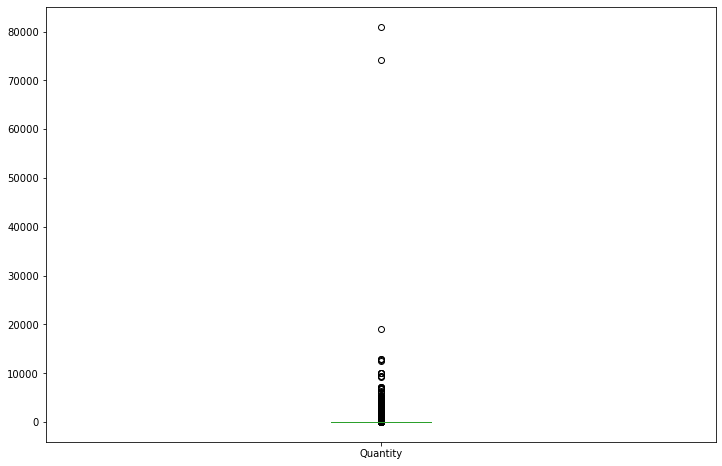

In [80]:
df['Quantity'].plot.box();

<AxesSubplot:>

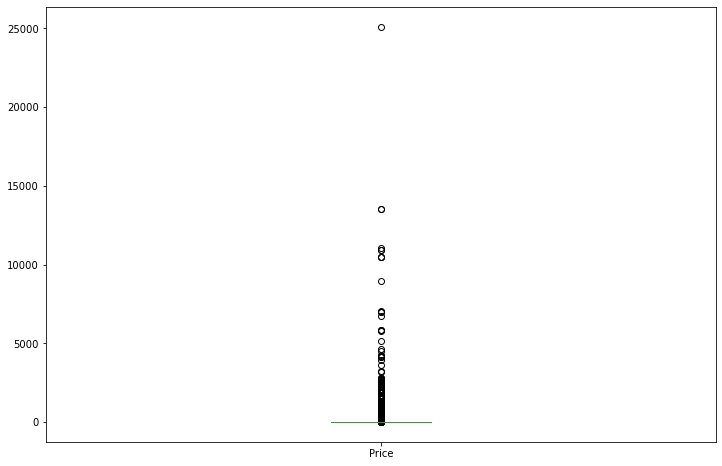

In [81]:
df['Price'].plot.box()

In [82]:
print(df['Customer ID'].isna().sum())
df['Customer ID'] =df['Customer ID'].fillna(99999)

235567


### Now the dataset is quite ok concerning reasonable values for prices and quantity as well as customer Id's
### I tried to get some more insight: By far the most orders came from United Kingdom followed by EIRE (I assume that is Ireland). The shipped item quantity was also the most for UK - but within less orders more items were shipped to the Netherlands than to Ireland. Just for information I also printed the best sold products and the customer ID's of our "best customers".

In [83]:
df.groupby("Country").agg({'Invoice': 'nunique'}).sort_values('Invoice', ascending = False)

,Invoice
Country,
United Kingdom,36229
EIRE,619
Germany,157
France,156
Netherlands,128
Australia,93
Spain,57
Sweden,56
Channel Islands,55


In [84]:
df.groupby("Country").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = False)

,Quantity
Country,
United Kingdom,9321322
Netherlands,361845
EIRE,331259
Denmark,231449
France,137258
Australia,103865
Sweden,79007
Germany,54274
Switzerland,38630


In [85]:
print('Best sold items / products by quantity')
print()
print(df.groupby("Description")['Quantity'].sum().sort_values(ascending = False).head())
print()
print('----------------------------------------------------------------------------------')
print()
print('Best bying customers by number of orders (unique invoice numbers)')
print()
print(df.rename(columns = {'Invoice':'Order count'}, inplace = False).groupby("Customer ID").agg({'Order count': 'nunique'}).sort_values('Order count', ascending = False).iloc[1:10])

Best sold items / products by quantity

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     107594
WHITE HANGING HEART T-LIGHT HOLDER     95618
PAPER CRAFT , LITTLE BIRDIE            80995
ASSORTED COLOUR BIRD ORNAMENT          79405
MEDIUM CERAMIC TOP STORAGE JAR         77967
Name: Quantity, dtype: int64

----------------------------------------------------------------------------------

Best bying customers by number of orders (unique invoice numbers)

             Order count
Customer ID             
14911.0              395
12748.0              330
17841.0              210
15311.0              205
13089.0              201
14606.0              190
14156.0              153
17850.0              153
18102.0              144


In [86]:
df["Revenue"] = df["Quantity"] * df["Price"]

In [87]:
#df.groupby("Country").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = False)

In [88]:
df['Invoice'].nunique()

37985

In [89]:
#Please ignore
#daily_df=pd.DataFrame(df['StockCode'].resample(rule='W').nunique())
#daily_df.rename(columns = {'StockCode':'Orders per Day'}, inplace = True)
#daily_df.index.rename('Day',inplace=True)
##daily_df['Weekday'] = daily_df.index.day_name()
#print(daily_df)
#daily_df['Orders: 7 Days Mean']=daily_df['Orders per Day'].rolling(window=7).mean()
#daily_df[['Orders per Day','Orders: 7 Days Mean' ]].plot(figsize=(20,5),title='Data Overview',grid=True);"""

### The dataset should be put in a real time series of sales numbers now. Therefore I count the unique invoice numbers per day and plot it

            Orders per Day    Weekday
Day                                  
2009-12-01             114    Tuesday
2009-12-02             113  Wednesday
2009-12-03             124   Thursday
2009-12-04              85     Friday
2009-12-05              30   Saturday
...                    ...        ...
2011-12-05             120     Monday
2011-12-06             104    Tuesday
2011-12-07              99  Wednesday
2011-12-08             116   Thursday
2011-12-09              38     Friday

[739 rows x 2 columns]


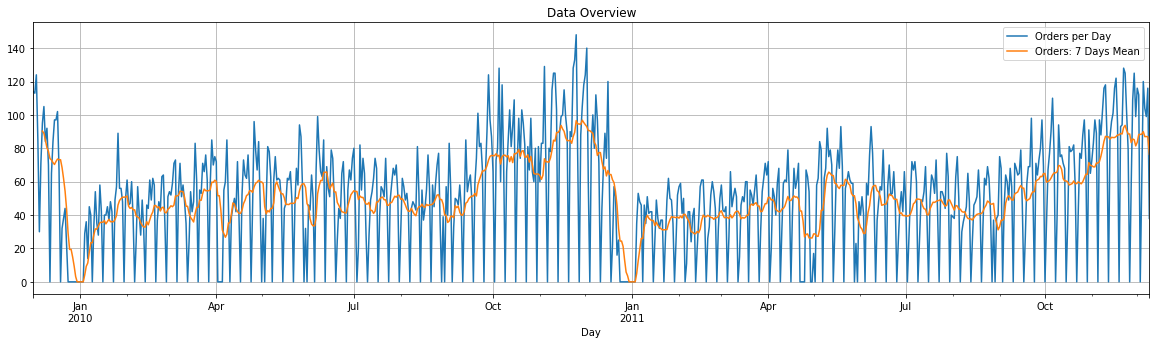

In [90]:
daily_df=pd.DataFrame(df['Invoice'].resample(rule='D').nunique())
daily_df.rename(columns = {'Invoice':'Orders per Day'}, inplace = True)

daily_df.index.rename('Day',inplace=True)
daily_df['Weekday'] = daily_df.index.day_name()

print(daily_df)
daily_df['Orders: 7 Days Mean']=daily_df['Orders per Day'].rolling(window=7).mean()
daily_df[['Orders per Day','Orders: 7 Days Mean' ]].plot(figsize=(20,5),title='Data Overview',grid=True);


### The dataset has a weekly pattern. No sales on Saturdays. Beneath some spread zero sales on Monday to Thursday I recognized that there were two weeks off with no sales at all. To get a clearer information I also printed the weekly sales data. It is obvious that the last calender week of the year no sales happens.

In [91]:
daily_df[daily_df['Orders per Day']==0].index.day_name().value_counts()

Saturday     104
Monday        11
Friday         7
Sunday         6
Thursday       3
Wednesday      2
Tuesday        2
Name: Day, dtype: int64

                Orders per Week  Calender Week
Sunday of Week                                
2009-12-06                  537             49
2009-12-13                  511             50
2009-12-20                  479             51
2009-12-27                  104             52
2010-01-03                    0             53
...                         ...            ...
2011-11-13                  598             45
2011-11-20                  622             46
2011-11-27                  584             47
2011-12-04                  619             48
2011-12-11                  477             49

[106 rows x 2 columns]


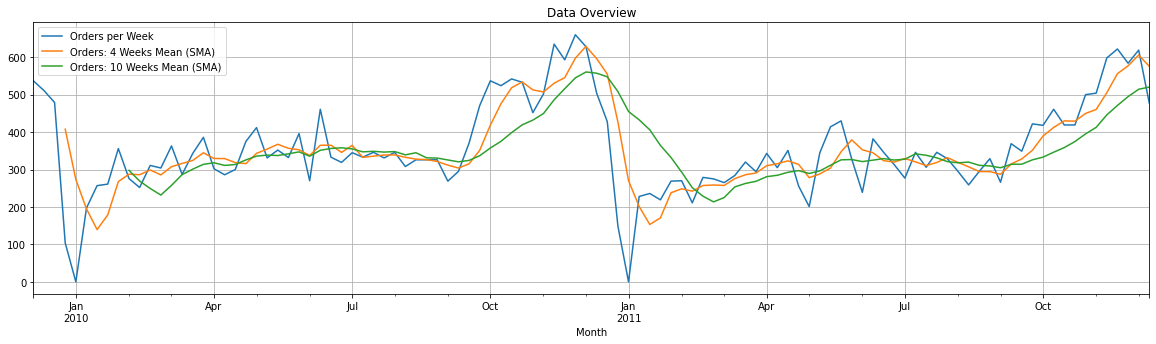

In [92]:
weekly_df=pd.DataFrame(df['Invoice'].resample(rule='W').nunique())
weekly_df.rename(columns = {'Invoice':'Orders per Week'}, inplace = True)

weekly_df.index.rename('Sunday of Week',inplace=True)
#weekly_df['Year-Week'] = weekly_df.index.strftime('%Y-%U')
weekly_df['Calender Week']=weekly_df.index.isocalendar()['week']
print(weekly_df)
weekly_df['Orders: 4 Weeks Mean (SMA)']=weekly_df['Orders per Week'].rolling(window=4).mean()
weekly_df['Orders: 10 Weeks Mean (SMA)']=weekly_df['Orders per Week'].rolling(window=10).mean()
weekly_df[['Orders per Week','Orders: 4 Weeks Mean (SMA)','Orders: 10 Weeks Mean (SMA)' ]].plot(xlabel='Month',figsize=(20,5),title='Data Overview',grid=True);
#weekly_df.plot(figsize=(20,5));

In [93]:
weekly_df[weekly_df['Orders per Week']==0]

,Orders per Week,Calender Week,Orders: 4 Weeks Mean (SMA),Orders: 10 Weeks Mean (SMA)
Sunday of Week,,,,
2010-01-03,0,53,273.50,NaN
2011-01-02,0,52,270.25,455.1


In [94]:
daily_df.head()

,Orders per Day,Weekday,Orders: 7 Days Mean
Day,,,
2009-12-01,114,Tuesday,NaN
2009-12-02,113,Wednesday,NaN
2009-12-03,124,Thursday,NaN
2009-12-04,85,Friday,NaN
2009-12-05,30,Saturday,NaN


In [95]:
weekly_df.head()

,Orders per Week,Calender Week,Orders: 4 Weeks Mean (SMA),Orders: 10 Weeks Mean (SMA)
Sunday of Week,,,,
2009-12-06,537,49,NaN,NaN
2009-12-13,511,50,NaN,NaN
2009-12-20,479,51,NaN,NaN
2009-12-27,104,52,407.75,NaN
2010-01-03,0,53,273.50,NaN


In [96]:
print('A decent downwardstrend from 2010 to 2011')
print(weekly_df.groupby(weekly_df.index.year)['Orders per Week'].mean())
print(weekly_df.groupby(weekly_df.index.year)['Orders per Week'].sum())

A decent downwardstrend from 2010 to 2011
Sunday of Week
2009    407.750000
2010    368.115385
2011    344.240000
Name: Orders per Week, dtype: float64
Sunday of Week
2009     1631
2010    19142
2011    17212
Name: Orders per Week, dtype: int64


In [97]:
weekly_df.tail()

,Orders per Week,Calender Week,Orders: 4 Weeks Mean (SMA),Orders: 10 Weeks Mean (SMA)
Sunday of Week,,,,
2011-11-13,598,45,505.25,445.9
2011-11-20,622,46,556.00,471.2
2011-11-27,584,47,577.00,494.7
2011-12-04,619,48,605.75,514.4
2011-12-11,477,49,575.50,520.3


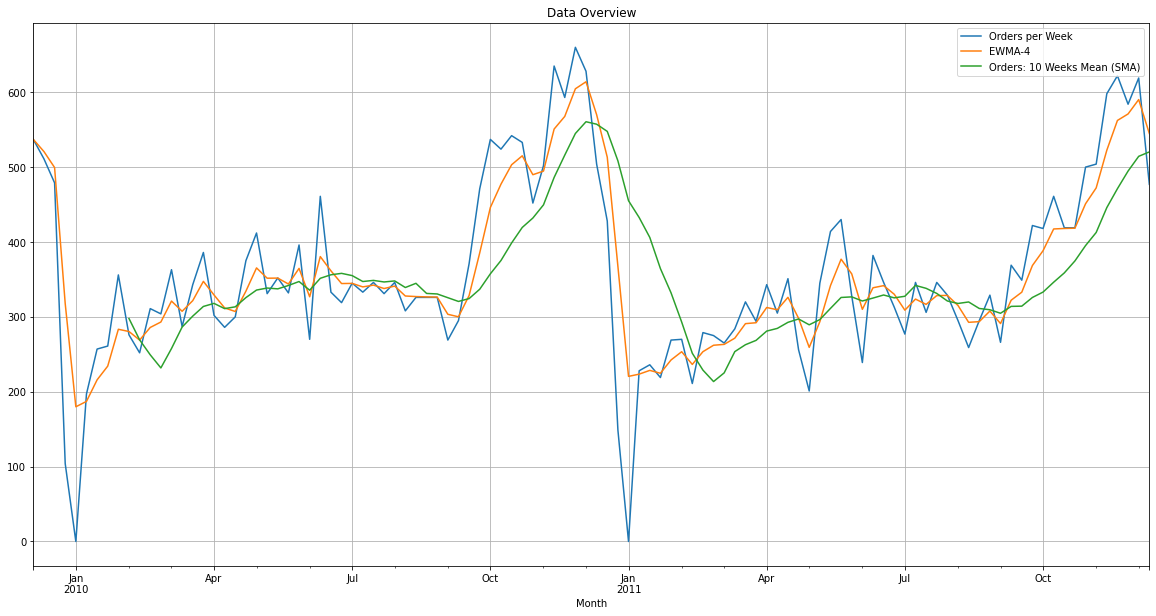

In [98]:
EWMA_df= weekly_df.copy() 
EWMA_df['EWMA-4']=EWMA_df['Orders per Week'].ewm(span=4).mean()

EWMA_df[['Orders per Week','EWMA-4','Orders: 10 Weeks Mean (SMA)']].plot(xlabel='Month',figsize=(20,10),grid=True,title='Data Overview');

### The printed data indicates that there is a yearly seasonal effect: a strong rise of sales from September to December and a very sharp drop in January. The last week of the year seems to be closed with no sales at all. Beneath that we have some kind of downwards trend from the year 2010 to the year 2011 which can be seen in the plots but also by looking at the average and absolute sales numbers per year, although the last 3 weeks of the year 2011 are not in the data. Let us see if more plots can tell us more about the data. The data shows no reals seasonality just a typical seasonal yearly course. This effect will be hard to learn as we just have one full season in the data (year 2010). From my point of view the best way to tackle this problem is just to learn the typical yearly behaviour and add a slight downwards trend to the prediction.

In [99]:
from statsmodels.tsa.seasonal import seasonal_decompose

result1 = seasonal_decompose(weekly_df['Orders per Week'], model ='add',period=52)
result2 = seasonal_decompose(daily_df['Orders per Day'], model ='add',period=365)

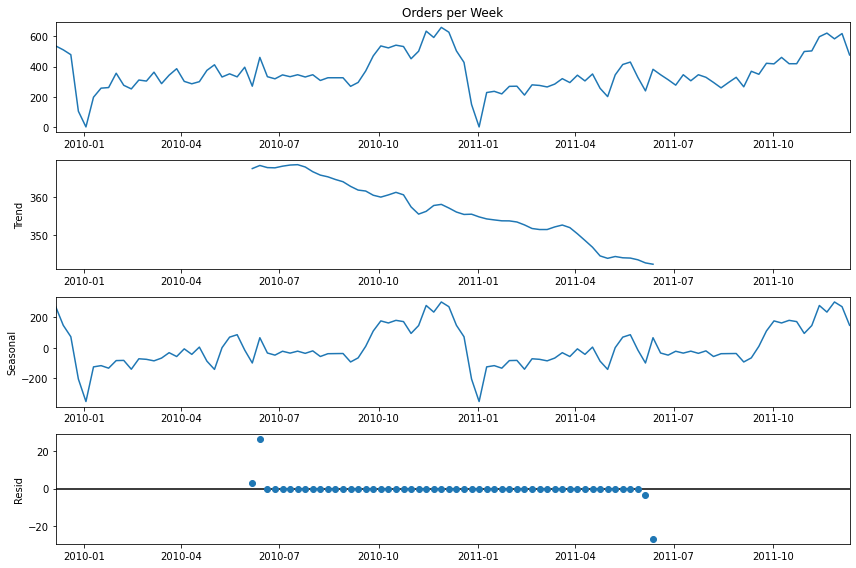

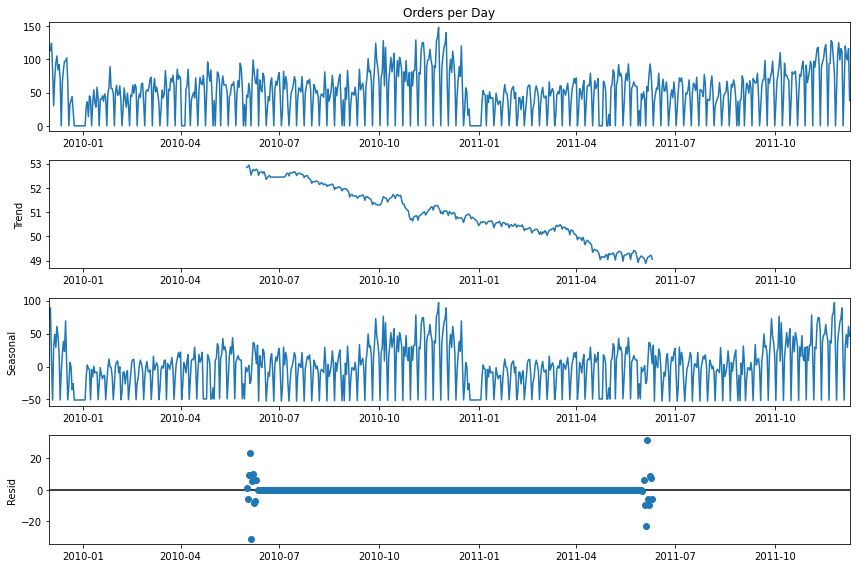

In [100]:
from pylab import rcParams
rcParams['figure.figsize']=12,8
result1.plot();
result2.plot();

### After visualizing the data I also tried to understand if there is a major influence of different countries on the curve. But it is really clear that UK leads the sales numbers by far and the other countries don't have that much impact. It was the same for the shipped product quantity. Nevertheless it was interesting to see how different the charts look like (e.g. Denmark quantity vs Netherlands quantity)

                 UK  Ireland  Germany  France
Sunday of Week                               
2009-12-06      524        4      NaN     1.0
2009-12-13      498        6      1.0     1.0
2009-12-20      460        9      3.0     0.0
2009-12-27      101        1      0.0     0.0
2010-01-03        0        0      0.0     0.0
...             ...      ...      ...     ...
2011-11-13      572       13      3.0     5.0
2011-11-20      589       13      4.0     3.0
2011-11-27      557        9      6.0     3.0
2011-12-04      602        9      1.0     2.0
2011-12-11      460        6      NaN     NaN

[106 rows x 4 columns]


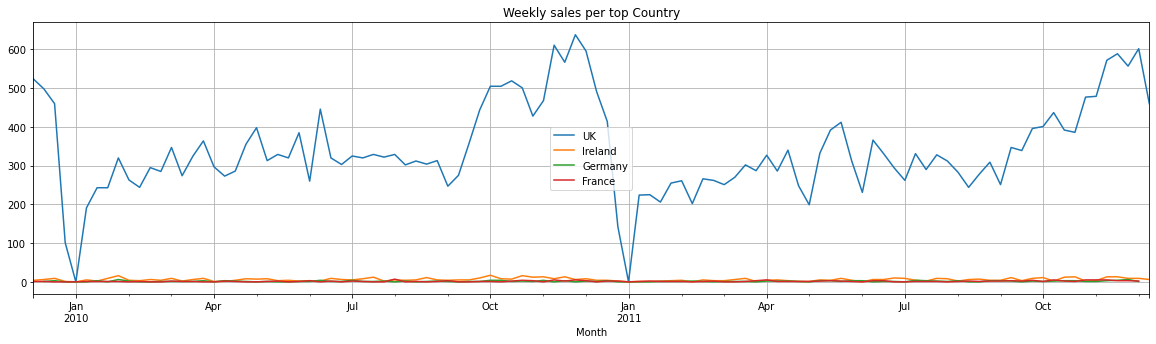

In [101]:
weekly_df_countries=pd.DataFrame(index=weekly_df.index)
weekly_df_countries['UK']=df[df['Country']=='United Kingdom']['Invoice'].resample(rule='W').nunique()
weekly_df_countries['Ireland']=df[df['Country']=='EIRE']['Invoice'].resample(rule='W').nunique()
weekly_df_countries['Germany']=df[df['Country']=='Germany']['Invoice'].resample(rule='W').nunique()
weekly_df_countries['France']=df[df['Country']=='France']['Invoice'].resample(rule='W').nunique()

weekly_df_countries.index.rename('Sunday of Week',inplace=True)


print(weekly_df_countries)
weekly_df_countries.plot(xlabel='Month',figsize=(20,5),title='Weekly sales per top Country',grid=True);



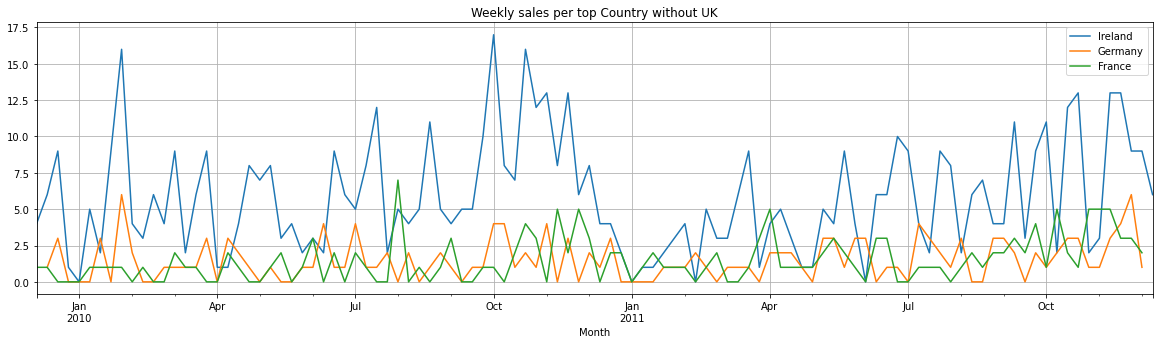

In [102]:
weekly_df_countries[['Ireland','Germany','France']].plot(xlabel='Month',figsize=(20,5),title='Weekly sales per top Country without UK',grid=True);


In [103]:
weekly_df[['Orders per Week','Calender Week']].to_csv('weekly.csv',index=True)

                    UK  Netherlands  Ireland  Denmark
Sunday of Week                                       
2009-12-06      134364         3792      940    480.0
2009-12-13      110083            0     1238      0.0
2009-12-20      121682         6560     2724      0.0
2009-12-27       20399            0     4512      0.0
2010-01-03           0            0        0      0.0
...                ...          ...      ...      ...
2011-11-13      159181         7752     5739      0.0
2011-11-20      155091            0     5861   1025.0
2011-11-27      135558         7244     2631      0.0
2011-12-04      138122            0     2631    512.0
2011-12-11      224549         7958     3023      NaN

[106 rows x 4 columns]


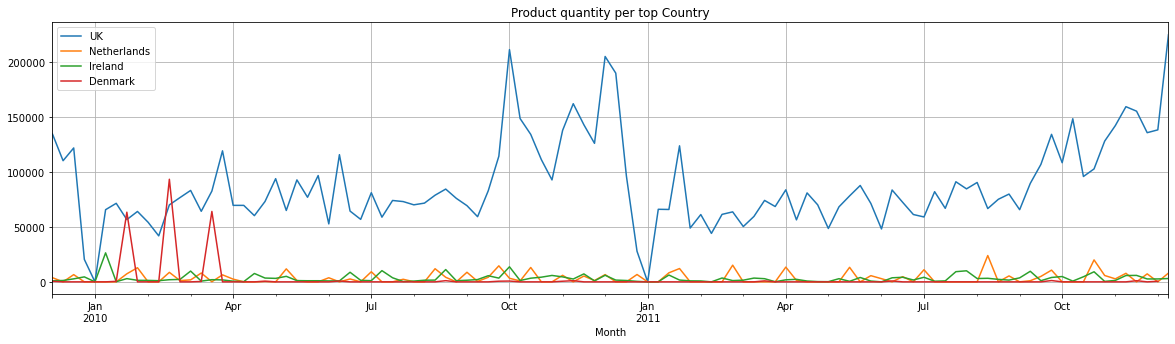

In [104]:
weekly_df_countries_quant=pd.DataFrame(index=weekly_df.index)
weekly_df_countries_quant['UK']=df[df['Country']=='United Kingdom']['Quantity'].resample(rule='W').sum()
weekly_df_countries_quant['Netherlands']=df[df['Country']=='Netherlands']['Quantity'].resample(rule='W').sum()
weekly_df_countries_quant['Ireland']=df[df['Country']=='EIRE']['Quantity'].resample(rule='W').sum()
weekly_df_countries_quant['Denmark']=df[df['Country']=='Denmark']['Quantity'].resample(rule='W').sum()

weekly_df_countries_quant.fillna(0)

weekly_df_countries_quant.index.rename('Sunday of Week',inplace=True)


print(weekly_df_countries_quant)
weekly_df_countries_quant.plot(xlabel='Month',figsize=(20,5),title='Product quantity per top Country',grid=True);


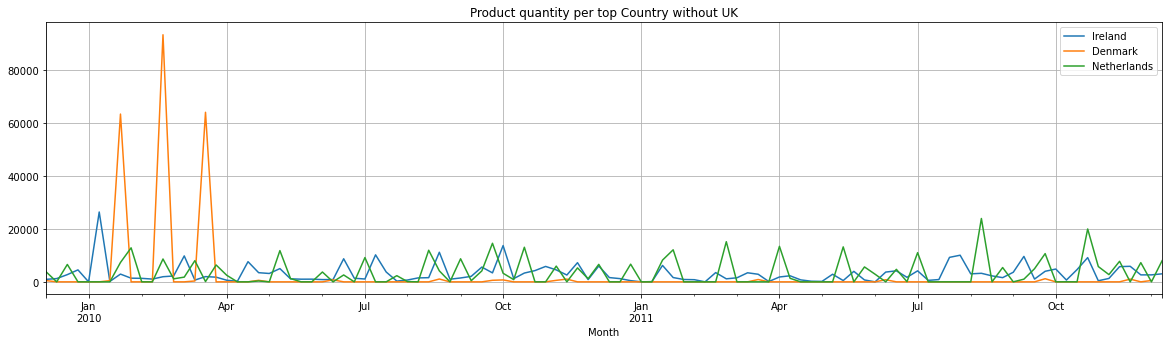

In [105]:
weekly_df_countries_quant[['Ireland','Denmark','Netherlands']].plot(xlabel='Month',figsize=(20,5),title='Product quantity per top Country without UK',grid=True);

### The last thing I was interested was the revenue chart of the dataset. It shows an expected chart in consideration of the charts I have plotted above. Maybe the sharp spike around december indicates that people buy more expensive stuff in this time. In the end I saved the data to a seperate csv which I read in the next Jupyter Notebook for forecasting the sales. I sticked to the weekly data as the daily information doesn't bring very helpful insights.

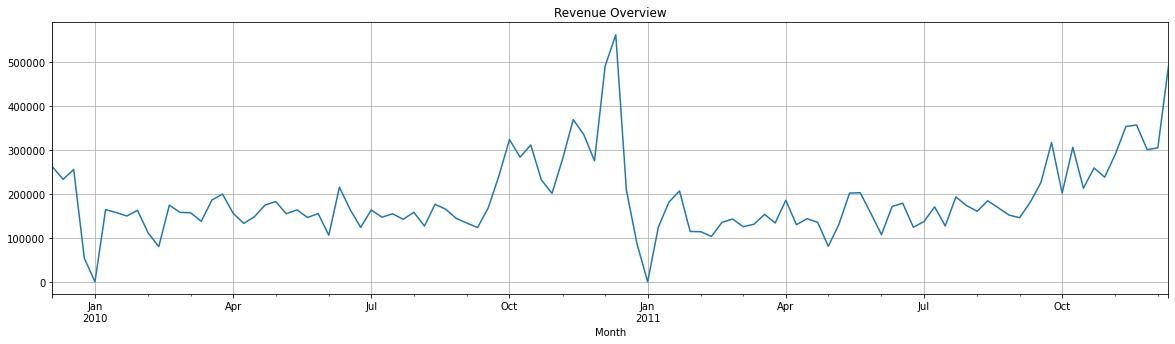

In [106]:
df['Revenue'].resample(rule='W').sum().plot(xlabel='Month',figsize=(20,5),title='Revenue Overview',grid=True);
#weekly_df.plot(figsize=(20,5));

In [107]:
#ignore 
#daily_df[['Orders per Day','Weekday']].to_csv('daily.csv',index=True)
#weekly_df[['Orders per Week','Calender Week']].to_csv('weekly.csv',index=True)

In [108]:
#ignore 
#n = pd.read_csv('weekly.csv',index_col='Sunday of Week',parse_dates=True)

In [109]:
#ignore 
#n.index.freq='W'